In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 


In [2]:
#loading data file
#dataset source:https://archive.ics.uci.edu/ml/datasets/Website+Phishing
fullFileName='C:/Users/SARA/Desktop/D I C/9351/travail pratique 1/dataset/PhishingData.csv'
data= pd.read_csv(fullFileName, sep=',', header=0)

In [3]:
df = data.drop('id', axis = 1)

In [4]:
print("Dataset shape:: ", df.shape)
print("Dataset Lenght:: ",len(df))
df.isnull().sum(axis=0)

Dataset shape::  (1353, 10)
Dataset Lenght::  1353


SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [5]:
print("Dataset:: ")
df.head()
df.info()
df.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
SFH                  1353 non-null int64
popUpWidnow          1353 non-null int64
SSLfinal_State       1353 non-null int64
Request_URL          1353 non-null int64
URL_of_Anchor        1353 non-null int64
web_traffic          1353 non-null int64
URL_Length           1353 non-null int64
age_of_domain        1353 non-null int64
having_IP_Address    1353 non-null int64
Result               1353 non-null int64
dtypes: int64(10)
memory usage: 105.8 KB


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Replacing the phishy class by the value 2
# the classes were all non negative values
#
# we have 3 classes namely 0,1,-1
# we combine 0 and 1 as 0 and -1 as 1
df['Result'].replace((0, 1, -1), (0, 0, 1), inplace = True)
df['Result'].value_counts()
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,0
2,1,-1,0,0,-1,0,-1,1,0,0
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,0


In [9]:
data_=df.values
X1 = data_[:,0:-1] 
Y = data_[:,-1]
 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 

  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
#Applying Standard scaling to get optimized result

In [10]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [11]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [12]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [13]:
X_train_T.duplicated().sum()

0

In [14]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [15]:
features_to_keep=[not index for index in duplicated_features]

In [16]:
X_train_=X_train_T[features_to_keep].T
X_test_=X_test_T[features_to_keep].T

In [17]:
X_train_.shape,X_test_.shape

((1082, 9), (271, 9))

In [18]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(X_train_, y_train)
# Function to make prediction
y_pred_en=dt.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en, average='weighted')


[[116  18]
 [ 22 115]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       134
           1       0.86      0.84      0.85       137

    accuracy                           0.85       271
   macro avg       0.85      0.85      0.85       271
weighted avg       0.85      0.85      0.85       271



0.8523904846891607

In [19]:
#Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, max_features=.2)
rfc.fit(X_train_, y_train)
predictionRF=rfc.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')


[[119  15]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       134
           1       0.89      0.86      0.87       137

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



0.8745319119857865

In [20]:
#define K
import math
math.sqrt(len(y_test))

16.46207763315433

In [21]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_, y_train)
predictionKNN=knn.predict(X_test_)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[112  22]
 [ 20 117]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       134
           1       0.84      0.85      0.85       137

    accuracy                           0.85       271
   macro avg       0.85      0.84      0.84       271
weighted avg       0.85      0.85      0.84       271



0.8449973401335844

In [22]:
# svm Classifier
clf=svm.SVC(kernel="rbf", C=1)
clf.fit(X_train_,y_train)
predictionSVM=clf.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')
#print(f'f1_score: {f1_score(y_test, predictionSVM,average='weighted', labels=np.unique(predictionSVM))}')

[[117  17]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       134
           1       0.87      0.85      0.86       137

    accuracy                           0.86       271
   macro avg       0.86      0.86      0.86       271
weighted avg       0.86      0.86      0.86       271



C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8597709604547025

In [23]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train_,y_train)
predictionbg=bg.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[118  16]
 [ 16 121]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       134
           1       0.88      0.88      0.88       137

    accuracy                           0.88       271
   macro avg       0.88      0.88      0.88       271
weighted avg       0.88      0.88      0.88       271



0.8819188191881919

In [24]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_,y_train)
predictionadb=adb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[116  18]
 [ 19 118]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       134
           1       0.87      0.86      0.86       137

    accuracy                           0.86       271
   macro avg       0.86      0.86      0.86       271
weighted avg       0.86      0.86      0.86       271



0.8634723530126759

In [26]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_,y_train)
predictionnb=nb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted', labels=np.unique(predictionnb))

[[107  27]
 [ 25 112]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       134
           1       0.81      0.82      0.81       137

    accuracy                           0.81       271
   macro avg       0.81      0.81      0.81       271
weighted avg       0.81      0.81      0.81       271



0.808091944927295

In [27]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_,y_train)
predictionNN=nn.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted', labels=np.unique(predictionNN))


[[118  16]
 [ 25 112]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       134
           1       0.88      0.82      0.85       137

    accuracy                           0.85       271
   macro avg       0.85      0.85      0.85       271
weighted avg       0.85      0.85      0.85       271



0.8485971902835983

In [28]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train_,y_train)
predictionevc=evc.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted', labels=np.unique(predictionevc))

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[118  16]
 [ 20 117]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       134
           1       0.88      0.85      0.87       137

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



0.8671514362202446

In [29]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [30]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_, y_train)
    prediction=clf.predict(X_test_)
    score=f1_score(y_test, prediction,average='weighted', labels=np.unique(prediction))
    scores.append(score)

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
scores

[0.8523904846891607,
 0.8819188191881919,
 0.8597709604547025,
 0.8449973401335844,
 0.8671622892699515,
 0.8671261088904604,
 0.808091944927295,
 0.8485971902835983,
 0.8523623432116225]

In [35]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure of Website Phishing'] = scores 
df

,Machine Learning algorithms,F-measure of Website Phishing
0,Decision_Tree,0.852390
1,Random_Forest,0.881919
2,linear_SVM,0.859771
3,Nearest_Neighbors,0.844997
4,Bagging,0.867162
5,AdaBoost,0.867126
6,Naive_Bayes,0.808092
7,Neural_Net,0.848597
8,Vothing_classifier,0.852362


In [39]:
#adding colors to the data frame
cm = sns.light_palette('#40826D', as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Website Phishing
0,Decision_Tree,0.85239
1,Random_Forest,0.881919
2,linear_SVM,0.859771
3,Nearest_Neighbors,0.844997
4,Bagging,0.867162
5,AdaBoost,0.867126
6,Naive_Bayes,0.808092
7,Neural_Net,0.848597
8,Vothing_classifier,0.852362


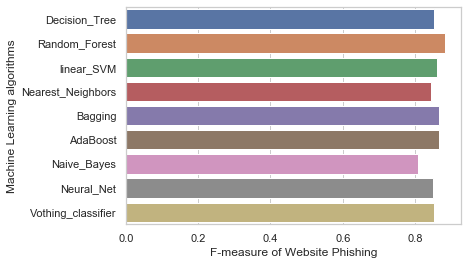

In [40]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Website Phishing", data=df)
